In [ ]:
!apt-get install python3.5

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libpython3.5-minimal libpython3.5-stdlib python3.5-minimal
Suggested packages:
  python3.5-venv python3.5-doc binfmt-support
The following NEW packages will be installed:
  libpython3.5-minimal libpython3.5-stdlib python3.5 python3.5-minimal
0 upgraded, 4 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,135 kB of archives.
After this operation, 22.7 MB of additional disk space will be used.
Get:1 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic/main amd64 libpython3.5-minimal amd64 3.5.10-1+bionic2 [542 kB]
Get:2 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic/main amd64 python3.5-minimal amd64 3.5.10-1+bionic2 [1,273 kB]
Get:3 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic/main amd64 libpython3.5-stdlib amd64 3.5.10-1+bionic2 [2,107 kB]
Get:4 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic/main amd

In [ ]:
!pip install biopython

     |████████████████████████████████| 2.3 MB 5.3 MB/s 


In [ ]:
!pip install bioinfokit

     |████████████████████████████████| 84 kB 2.1 MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.6-py3-none-any.whl size=57066 sha256=493e896c13c8900318c7454efd0928d64dcc855a6fc50d32048075ff4fc1b963
  Stored in directory: /root/.cache/pip/wheels/38/b2/a0/3f65c463d3faababa8cb5f3076e3bfc1c49fea2a736a49038a
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7094 sha256=c5d59bf8b166d5c6f9774bea3ae0be642bbb36d3babec5c9ce43d04bddae3b81
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built bioinfokit adjustText


In [ ]:
!pip install nglview

     |████████████████████████████████| 5.7 MB 4.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for nglview: filename=nglview-3.0.3-py3-none-any.whl size=8057549 sha256=7c4a9989bb93b4f919f06eedb789d9180fa2cb75846dea26f755181ee84aed4b
  Stored in directory: /root/.cache/pip/wheels/01/0c/49/c6f79d8edba8fe89752bf20de2d99040bfa57db0548975c5d5
Successfully built nglview


In [ ]:
!pip install pgmpy

     |████████████████████████████████| 1.9 MB 5.7 MB/s 


In [ ]:
!pip install statsmodels

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5 MB 6.5 MB/s 
     |████████████████████████████████| 9.5 MB 21.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
!pip install --user scipy==1.2.0
!pip install pymcmcstat

     |████████████████████████████████| 26.6 MB 72 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pmdarima 1.8.2 requires scipy>=1.3.2, but you have scipy 1.2.0 which is incompatible.
jax 0.2.20 requires scipy>=1.2.1, but you have scipy 1.2.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 136 kB 5.2 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score,classification_report,confusion_matrix
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
import pymcmcstat
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols
import warnings
warnings.filterwarnings('ignore')
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARIMAResults,ARMAResults
from Bio.Seq import Seq
from Bio import SeqIO
from collections import Counter
from Bio.PDB import PDBParser
import nglview as nv
# Import mean_absolute_error from sklearn's metrics module
from sklearn.metrics import mean_absolute_error

# Import mean_squared_error from sklearn's metrics module
from sklearn.metrics import mean_squared_error

# Import r2_score from sklearn's metrics module
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from plotnine.data import mpg
from plotnine import ggplot, aes, geom_point, geom_line, geom_bar

In [ ]:
df = pd.read_excel('top250parkinsonsgenes.xlsx')

In [ ]:
#checking the dataframe
df.head()

,ID,adj.P.Val,P.Value,t,B,logFC,Gene.symbol,Gene.title
0,217094_s_at,0.689,0.000039,4.376080,0.213,0.649475,ITCH,itchy E3 ubiquitin protein ligase
1,208666_s_at,0.689,0.000077,-4.188349,-0.173,-0.469233,ST13,suppression of tumorigenicity 13 (colon carcin...
2,219437_s_at,0.689,0.000130,4.041613,-0.469,0.896316,ANKRD11,ankyrin repeat domain 11
3,211971_s_at,0.689,0.000205,-3.908721,-0.733,-0.360352,LRPPRC,leucine rich pentatricopeptide repeat containing
4,205398_s_at,0.689,0.000206,-3.907682,-0.735,-0.863359,SMAD3,SMAD family member 3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           250 non-null    object 
 1   adj.P.Val    250 non-null    float64
 2   P.Value      250 non-null    float64
 3   t            250 non-null    float64
 4   B            250 non-null    float64
 5   logFC        250 non-null    float64
 6   Gene.symbol  234 non-null    object 
 7   Gene.title   234 non-null    object 
dtypes: float64(5), object(3)
memory usage: 15.8+ KB


In [ ]:
df.describe()

,adj.P.Val,P.Value,t,B,logFC
count,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.761748,0.004594,0.615648,-2.343780,0.132611
std,0.055125,0.002764,2.979628,0.551552,0.612605
min,0.689000,0.000039,-4.188349,-2.935000,-1.261720
25%,0.689000,0.002099,-2.813428,-2.761000,-0.373815
50%,0.809000,0.004798,2.758563,-2.547000,0.362526
75%,0.809000,0.006984,3.029811,-2.072500,0.645196
max,0.809000,0.009482,4.376080,0.213000,1.148714


In [ ]:
#dropping the Id column as they are not impacting for the PD genes finding
df = df.drop('ID',axis=1)

In [ ]:
df.head()

,adj.P.Val,P.Value,t,B,logFC,Gene.symbol,Gene.title
0,0.689,0.000039,4.376080,0.213,0.649475,ITCH,itchy E3 ubiquitin protein ligase
1,0.689,0.000077,-4.188349,-0.173,-0.469233,ST13,suppression of tumorigenicity 13 (colon carcin...
2,0.689,0.000130,4.041613,-0.469,0.896316,ANKRD11,ankyrin repeat domain 11
3,0.689,0.000205,-3.908721,-0.733,-0.360352,LRPPRC,leucine rich pentatricopeptide repeat containing
4,0.689,0.000206,-3.907682,-0.735,-0.863359,SMAD3,SMAD family member 3


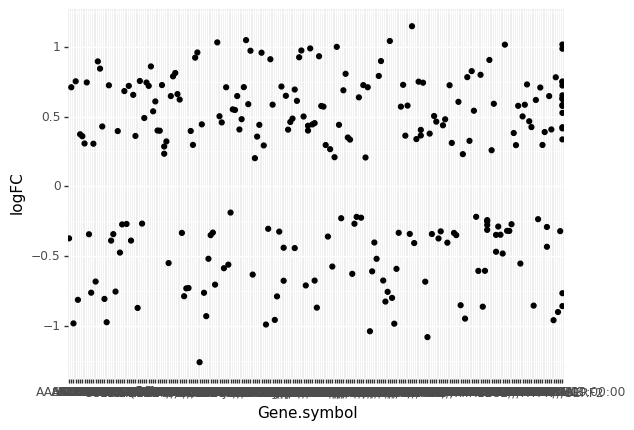

<ggplot: (8752610340277)>

In [ ]:
ggplot(df) + aes(x='Gene.symbol',y='logFC') + geom_point()

<Figure size 1080x720 with 0 Axes>

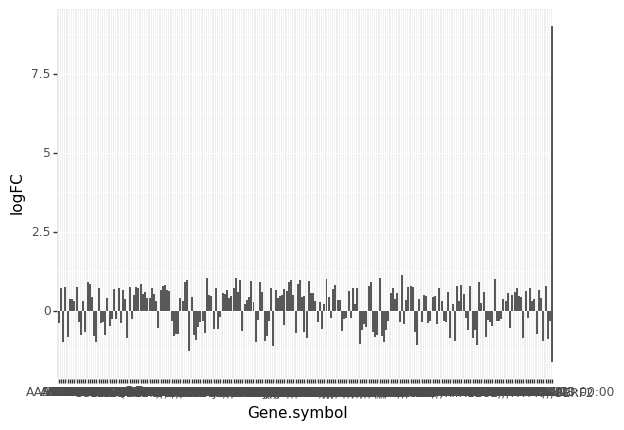

<ggplot: (8752610340257)>

In [ ]:
plt.figure(figsize=(15,10))
ggplot(df) + aes(x='Gene.symbol',y='logFC') + geom_bar(stat='identity')

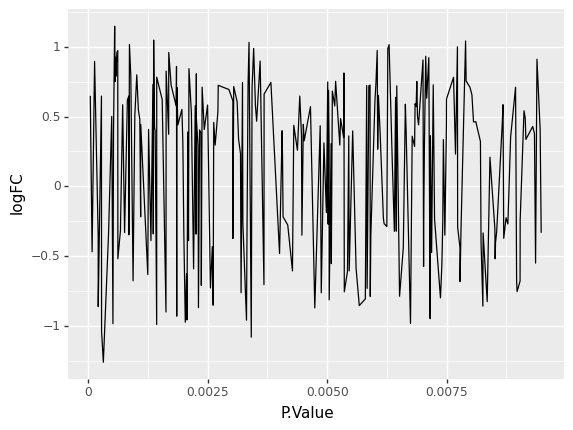

<ggplot: (8752599901413)>

In [ ]:
ggplot(df) + aes(x='P.Value',y='logFC') + geom_line()

In [ ]:
from bioinfokit import analys, visuz

In [ ]:
visuz.gene_exp.volcano(df=df, lfc='logFC', pv='P.Value',lfc_thr=(0.202,1), pv_thr=(0.05, 0.01), plotlegend=True, legendpos='upper right', 
    legendanchor=(1.46,1))

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


In [ ]:
#checking the null values in this dataframe
df.isnull().sum()

adj.P.Val       0
P.Value         0
t               0
B               0
logFC           0
Gene.symbol    16
Gene.title     16
dtype: int64

In [ ]:
#checking the number of unique values
df['Gene.symbol'].nunique()

223

In [ ]:
#checking the counts of those unique values
df['Gene.symbol'].value_counts()

SNX3      4
PSG6      2
KDM6A     2
LILRB3    2
ST13      2
         ..
OPA1      1
FAIM2     1
EIF3J     1
PEX14     1
ZMYM1     1
Name: Gene.symbol, Length: 223, dtype: int64

In [ ]:
df = df.drop('Gene.symbol',axis=1)

In [ ]:
df['logFC'].min()

-1.26172002

In [ ]:
df['logFC'].max()

1.14871395

In [ ]:
df['P.Value'].min()

3.94e-05

In [ ]:
df['P.Value'].max()

0.0094821

In [ ]:
#in total 136 gene symbols are upregulated genes with 150 upregulated values in the dataset with the range of 0.202 to 1.149
df[df['logFC'] >= 0.202].count()

adj.P.Val     150
P.Value       150
t             150
B             150
logFC         150
Gene.title    136
dtype: int64

In [ ]:
#in total 98 genes are downregulated genes according to the logFC values with the range of -0.188 to -1.262
df[df['logFC']<0.202].count()

adj.P.Val     100
P.Value       100
t             100
B             100
logFC         100
Gene.title     98
dtype: int64

In [ ]:
df1 = df.select_dtypes(exclude=['O'])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   adj.P.Val  250 non-null    float64
 1   P.Value    250 non-null    float64
 2   t          250 non-null    float64
 3   B          250 non-null    float64
 4   logFC      250 non-null    float64
dtypes: float64(5)
memory usage: 9.9 KB


Train-Test split


In [ ]:
x = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [ ]:
# Import Ridge from sklearn's linear_model module
from sklearn.linear_model import Ridge

# Import SVR from sklearn's svm module
from sklearn.svm import SVR

# Import RandomForestRegressor from sklearn's ensemble module
from sklearn.ensemble import RandomForestRegressor
# Import SimpleImputer from sklearn's impute module
from sklearn.impute import SimpleImputer
# Import ColumnTransformer from sklearn's compose module
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

In [ ]:
df1.columns

Index(['adj.P.Val', 'P.Value', 't', 'B', 'logFC'], dtype='object')

In [ ]:
# Define numeric features
numeric_features = ['adj.P.Val', 'P.Value', 't', 'B']

# Crearte numeric transformer Pipeline
numeric_transformer = Pipeline(steps=[
    # Set SimpleImputer strategy to fill missing values with the "Median if any"
    ("imputer", SimpleImputer(strategy="median"))])

In [ ]:
# Setup preprocessing steps (fill missing values)
preprocessor = ColumnTransformer(
    transformers=[
        # Use the numeric_transformer to transform the numeric_features
        ("num", numeric_transformer, numeric_features)])

In [ ]:
# Create dictionary of model instances, there should be 4 total key, value pairs
# in the form {"model_name": model_instance}.
# Don't forget there's two versions of SVR, one with a "linear" kernel and the
# other with kernel set to "rbf".
regression_models = {"Ridge": Ridge(),
                     "SVR_linear": SVR(kernel="linear"),
                     "SVR_rbf": SVR(kernel="rbf"),
                     "RandomForestRegressor": RandomForestRegressor()}

# Create an empty dictionary for the regression results
regression_results = {}

In [ ]:
# Loop through the items in the regression_models dictionary
for model_name, model in regression_models.items():
    
    # Create a model pipeline with a preprocessor step and model step
    model_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                      ("model", model)])
    
    # Fit the model pipeline to the training data
    print(f"Fitting {model_name}...")
    model_pipeline.fit(X_train, y_train)
    
    # Score the model pipeline on the test data appending the model_name to the 
    # results dictionary
    print(f"Scoring {model_name}...")
    regression_results[model_name] = model_pipeline.score(X_test, 
                                                          y_test)

Fitting Ridge...
Scoring Ridge...
Fitting SVR_linear...
Scoring SVR_linear...
Fitting SVR_rbf...
Scoring SVR_rbf...
Fitting RandomForestRegressor...
Scoring RandomForestRegressor...


In [ ]:
# Check the results of each regression model by printing the regression_results
# dictionary
regression_results

{'RandomForestRegressor': 0.768321562252787,
 'Ridge': 0.8412536302473311,
 'SVR_linear': 0.843960790694567,
 'SVR_rbf': 0.8359959557172834}

In [ ]:
# Create RidgeRegression Pipeline with preprocessor as the "preprocessor" and
# Ridge() as the "model".
ridge_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                 ("model", Ridge())])

# Fit the RidgeRegression Pipeline to the  training data
ridge_pipeline.fit(X_train, y_train)

# Make predictions on the y test data using the RidgeRegression Pipeline
y_preds = ridge_pipeline.predict(X_test)

# View the first 50 predictions
y_preds[:50]

array([ 0.63297075, -0.52935858, -0.49052077,  0.58831189,  0.59830425,
        0.54908358, -0.51969272,  0.61891038, -0.53432463, -0.51427231,
       -0.57136841,  0.60818841, -0.6442048 ,  0.65416731,  0.60055577,
       -0.49817447,  0.58228943,  0.6323197 ,  0.5586742 , -0.74200089,
        0.6211024 ,  0.5395087 ,  0.59051849,  0.54381978, -0.50492759,
        0.56587426,  0.54738415,  0.56380224,  0.5832487 ,  0.56113138,
       -0.50024604,  0.56136269,  0.54524543,  0.59614776, -0.6363484 ,
       -0.56887615, -0.52361321,  0.65626252, -0.59889721,  0.70817278,
        0.71082461,  0.55547016, -0.514433  , -0.52632625,  0.67034607,
        0.59163836,  0.66062775,  0.6425748 ,  0.56613882, -0.50429248])

Now we've got some predictions, time to evaluate them. We'll find the mean squared error (MSE), mean absolute error (MAE) and R^2 score (coefficient of determination) of our model.

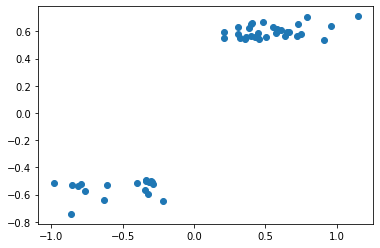

In [ ]:
plt.scatter(y_test,y_preds)

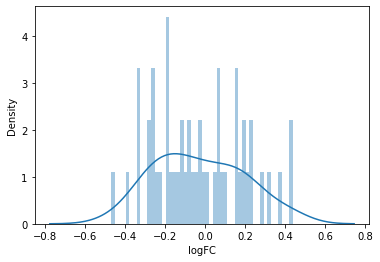

In [ ]:
sns.distplot((y_test-y_preds),bins=50);

Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_preds))
print('MSE:', metrics.mean_squared_error(y_test, y_preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_preds)))
print('r2_score', r2_score(y_test,y_preds))

MAE: 0.18947644559124907
MSE: 0.04972553908377795
RMSE: 0.22299223996313852
r2_score 0.8412536302473311


**classification task**


1.   Checking the Patients are suffering from PD or not with the parkinsson disease data below down~




In [ ]:
df2 = pd.read_csv('Parkinsson disease.csv')

In [ ]:
df2.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
df2.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
df2.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
df2.drop('name',axis=1,inplace=True)

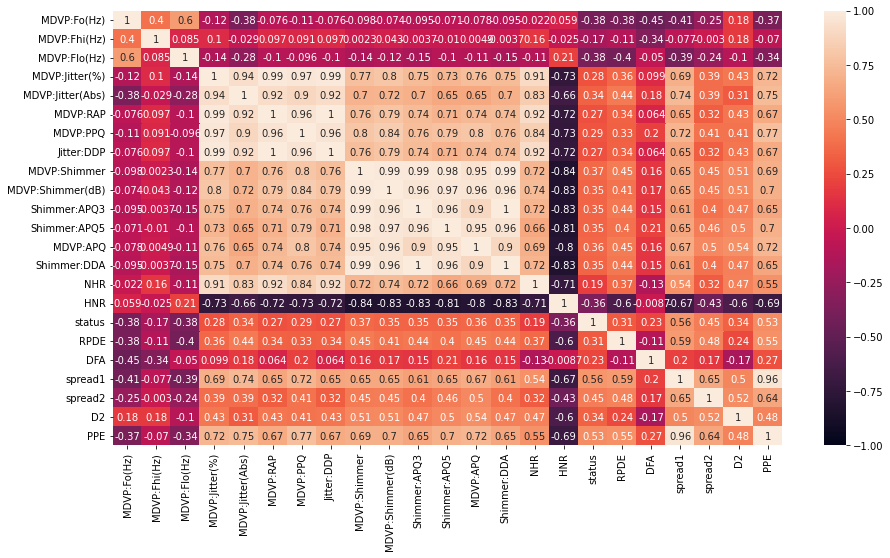

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df2.corr(),vmin=-1,vmax=1,annot=True)

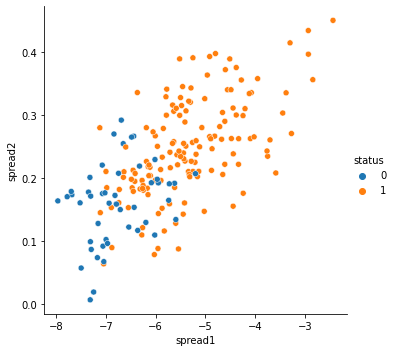

In [ ]:
sns.relplot(x='spread1', y='spread2',hue='status',data=df2)

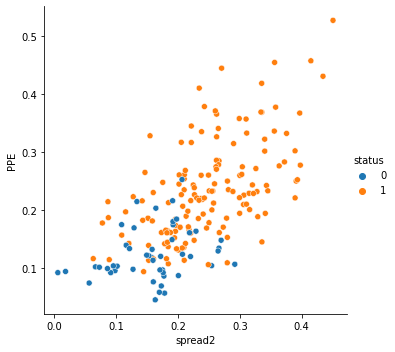

In [ ]:
sns.relplot(x='spread2', y='PPE',hue='status',data=df2)

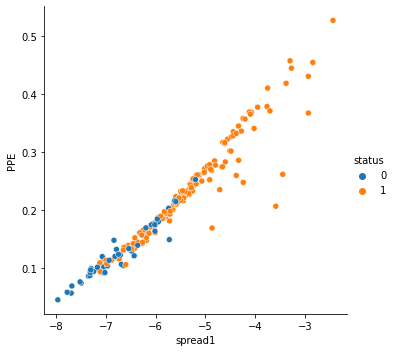

In [ ]:
sns.relplot(x='spread1', y='PPE',hue='status',data=df2)

No handles with labels found to put in legend.


<Figure size 1080x576 with 0 Axes>

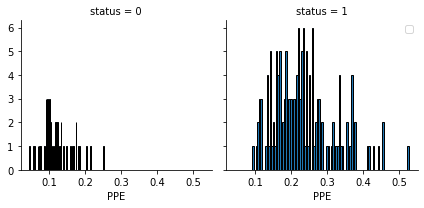

In [ ]:
## lets look at the status and check for normal distribution accross spread as status 
plt.figure(figsize=(15,8))
g = sns.FacetGrid(df2,col='status',palette='Set1',col_wrap=2)
g.map(plt.hist,'PPE',bins=100,ec='k')
g.axes[-1].legend()
plt.show()

No handles with labels found to put in legend.


<Figure size 1080x576 with 0 Axes>

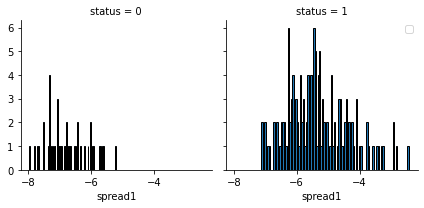

In [ ]:
## lets look at the status and check for normal distribution accross spread as status is highly correlated with spread1
plt.figure(figsize=(15,8))
g = sns.FacetGrid(df2,col='status',palette='Set1',col_wrap=2)
g.map(plt.hist,'spread1',bins=100,ec='k')
g.axes[-1].legend()
plt.show()

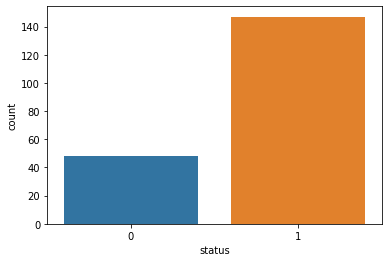

In [ ]:
sns.countplot(x='status',data=df2)

creating the dependent(x) and independent variable(y)

In [ ]:
x = df2.drop('status',axis=1).values
y = df2['status'].values

creating the train-test split for the prediction

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

creating a function to evaluate the predictions and return the value as dictionary in metic_dict

In [ ]:
def evaluate_preds(y_true,y_pred):

  accuracy = accuracy_score(y_true,y_pred)
  precision = precision_score(y_true,y_pred)
  recall = recall_score(y_true,y_pred)
  f1 = f1_score(y_true,y_pred)

  metric_dict = {'accuracy':round(accuracy,2),
                 'precision':round(precision,2),
                 'recall': round(recall,2),
                 'f1':round(f1,2)}
  print(f'acc : {accuracy * 100:.2f}%')
  print(f'precision : {precision * 100:.2f}%')
  print(f'recall : {recall * 100:.2f}%')
  print(f'f1 : {f1 * 100:.2f}%')

  return metric_dict

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

y_preds = clf.predict(x_test)

#evaluate the predictions
baseline_metrics = evaluate_preds(y_test,y_preds)

acc : 93.22%
precision : 91.67%
recall : 100.00%
f1 : 95.65%


##Hyperparameter tuning with RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators':[10,100,200,500,1000,1200],
        'max_depth': [None,5,10,20,30],
        'max_features':['auto','sqrt'],
        'min_samples_split':[2,4,6],
        'min_samples_leaf':[1,2,4]}

np.random.seed(42)

#initiate the randomforestclassifer
clf = RandomForestClassifier(n_jobs=1)

#setup randomized searchcv
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10,
                            cv=5,
                            verbose=2)

rs_clf.fit(x_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   48.6s finished


In [ ]:
rs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
rs_y_preds = rs_clf.predict(x_test)

#evaluate the predictions
rs_metrics = evaluate_preds(y_test,rs_y_preds)

acc : 91.53%
precision : 91.49%
recall : 97.73%
f1 : 94.51%


##Hypertuning with GridSearchCV unlike RandomSearchCV GRidSearchCV goes through every possible combinations whereas in RamdomSearchCV it finds through only iters provided and then tries random combinations

In [ ]:
grid_2 = {'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_leaf': [1, 2],
          'min_samples_split': [6],
          'n_estimators': [100, 200, 500]}

In [ ]:
from sklearn.model_selection import GridSearchCV

#initiate the randomforestclassifer
clf = RandomForestClassifier(n_jobs=1)

#setup Gridsearchcv
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5,verbose=2)

gs_clf.fit(x_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   27.9s finished


In [ ]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 500}

In [ ]:
gs_y_preds = gs_clf.predict(x_test)

#evaluate the metrics
gs_metrics = evaluate_preds(y_test,gs_y_preds)

acc : 93.22%
precision : 91.67%
recall : 100.00%
f1 : 95.65%


In [ ]:
print(classification_report(y_preds,y_test))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85        11
           1       1.00      0.92      0.96        48

    accuracy                           0.93        59
   macro avg       0.87      0.96      0.90        59
weighted avg       0.95      0.93      0.94        59



In [ ]:
print(classification_report(gs_y_preds,y_test))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85        11
           1       1.00      0.92      0.96        48

    accuracy                           0.93        59
   macro avg       0.87      0.96      0.90        59
weighted avg       0.95      0.93      0.94        59



In [ ]:
print(classification_report(rs_y_preds,y_test))

              precision    recall  f1-score   support

           0       0.73      0.92      0.81        12
           1       0.98      0.91      0.95        47

    accuracy                           0.92        59
   macro avg       0.86      0.92      0.88        59
weighted avg       0.93      0.92      0.92        59



##lets compare the metrics after all hypertuning_paramters

In [ ]:
compare_metrics = pd.DataFrame({'baseline': baseline_metrics,
                                'rs_metrics': rs_metrics,
                                'gs_metrics':gs_metrics})

In [ ]:
compare_metrics

,baseline,rs_metrics,gs_metrics
accuracy,0.93,0.92,0.93
precision,0.92,0.91,0.92
recall,1.00,0.98,1.00
f1,0.96,0.95,0.96


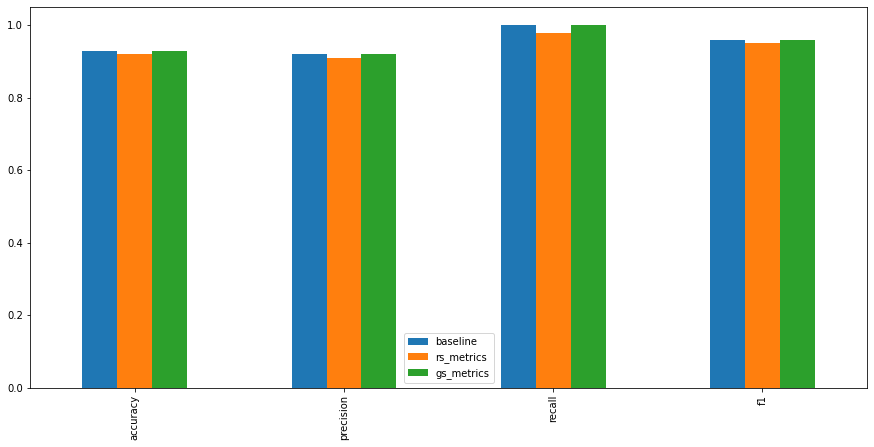

In [ ]:
compare_metrics.plot.bar(figsize=(15,7))

In [ ]:
from sklearn.metrics import roc_curve

#making predictions with probabilities
clf.fit(x_train,y_train)
y_probs = clf.predict_proba(x_test)
rs_probs = rs_clf.predict_proba(x_test)
gs_probs = gs_clf.predict_proba(x_test)


In [ ]:
y_probs_positive = y_probs[:,1]

rs_probs_positive = rs_probs[:,1]

gs_probs_positive = gs_probs[:,1]


y_probs_positive[:5], rs_probs_positive[:5], gs_probs_positive[:5]

(array([0.99, 0.86, 1.  , 0.94, 0.99]),
 array([0.995     , 0.88216667, 1.        , 0.90916667, 0.975     ]),
 array([0.99034286, 0.87398175, 0.98261061, 0.90758175, 0.97222727]))

In [ ]:
def plot_curve(fpr, tpr):
  '''
  plot a roc curve given the false positive rate (fpr) 
  and true postive rate (tpr) of a model.
  '''
  plt.plot(fpr,tpr,color='orange', label= 'ROC')
  
  #plot line with no predictive power
  plt.plot([0,1], [0,1], color='darkblue',linestyle='--', label='guessing') # adding the line of ----- 

  #customize the plot
  plt.xlabel('fpr')
  plt.ylabel('tpr')
  plt.title('Receiver operating characteristic (ROC) curve')
  plt.legend()
  plt.show()

In [ ]:
#calculate fpr, tpr, and thresholds for baseline model
fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)

#calculate for ramdomzied searchcv
fpr_rs,tpr_rs,thresholds_rs = roc_curve(y_test,rs_probs_positive)

#calculate for Grid searchcv
fpr_gs,tpr_gs,thresholds_gs = roc_curve(y_test,gs_probs_positive)

##baseline roc curve

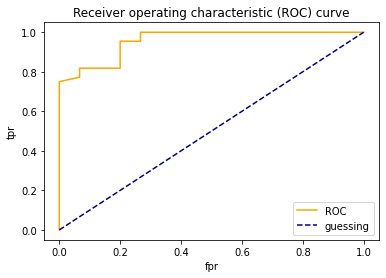

In [ ]:
plot_curve(fpr,tpr)

##rs roc curve

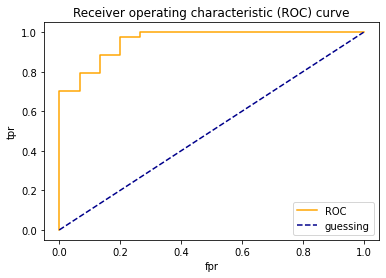

In [ ]:
plot_curve(fpr_rs,tpr_rs)

##gs roc curve

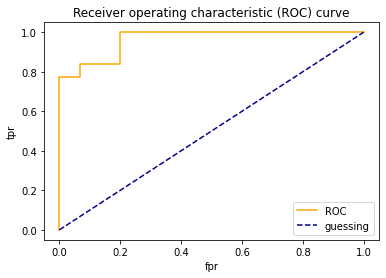

In [ ]:
plot_curve(fpr_gs,tpr_gs)